# Explore here

In [47]:
# Your code here
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
# Eliminamos las otras columnas ya que no nos intersan, nos quedamos solo con estas tres para realizar el ejercicio.
df = df[["Latitude", "Longitude", "MedInc"]]

# Display the result
print(df)

       Latitude  Longitude  MedInc
0         37.88    -122.23  8.3252
1         37.86    -122.22  8.3014
2         37.85    -122.24  7.2574
3         37.85    -122.25  5.6431
4         37.85    -122.25  3.8462
...         ...        ...     ...
20635     39.48    -121.09  1.5603
20636     39.49    -121.21  2.5568
20637     39.43    -121.22  1.7000
20638     39.43    -121.32  1.8672
20639     39.37    -121.24  2.3886

[20640 rows x 3 columns]


In [50]:
df.duplicated().sum()

np.int64(5)

In [51]:
df.drop_duplicates()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [52]:
df.isnull().sum()

Latitude     0
Longitude    0
MedInc       0
dtype: int64

In [53]:
# Dividir en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

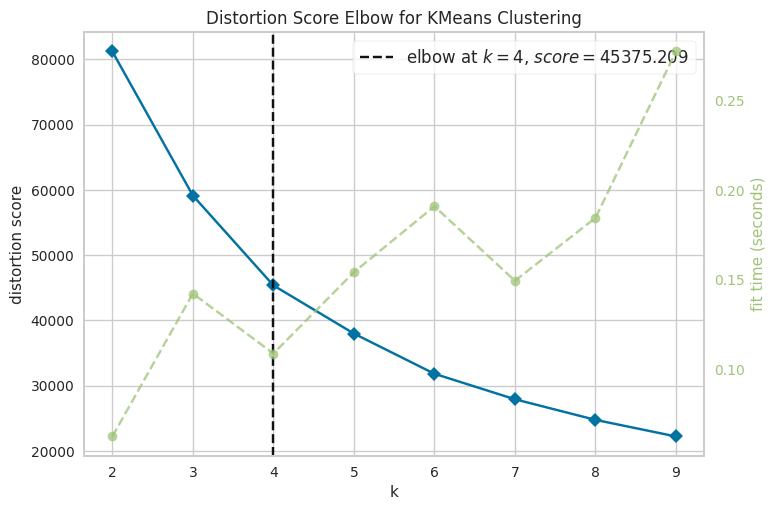

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Determine the optimal number of clusters using KElbowVisualizer
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(train_data)
visualizer.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

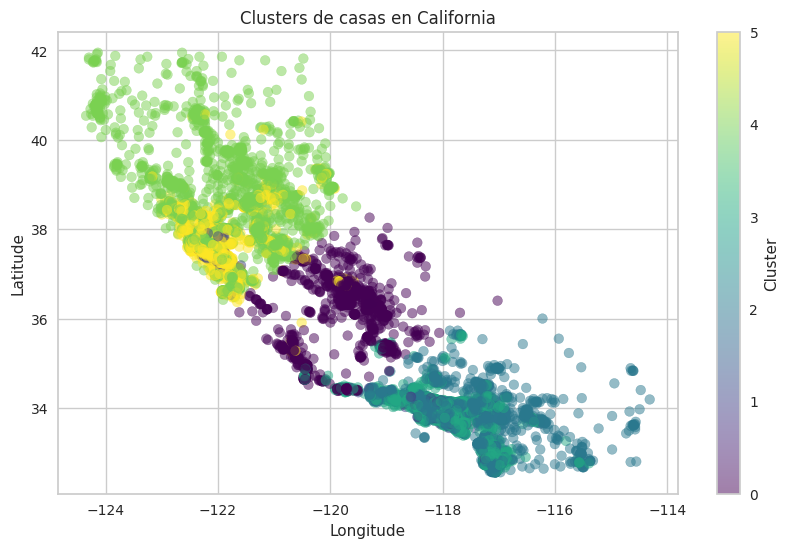

In [55]:
# Paso 2: Aplicar K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(train_data)
train_data['cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas en California')
plt.colorbar(label='Cluster')
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

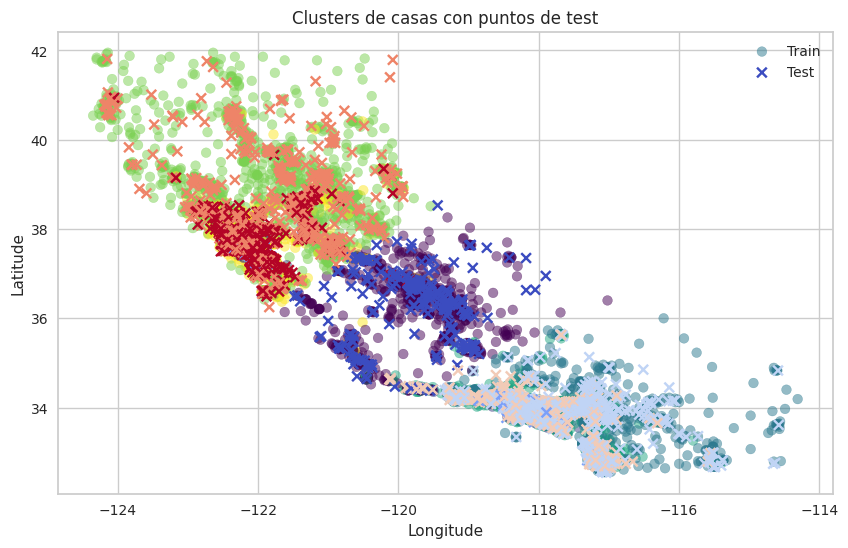

In [56]:
# Paso 3: Predecir con el conjunto de test
test_clusters = kmeans.predict(test_data)
test_data['cluster'] = test_clusters

# Añadir puntos al gráfico
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='coolwarm', marker='x', label='Test')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas con puntos de test')
plt.legend()
plt.show()

In [57]:
# Paso 4: Entrenar un modelo supervisado
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [58]:
# Evaluar el modelo
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       338
           1       1.00      0.97      0.98        89
           2       1.00      1.00      1.00      1488
           3       1.00      0.99      0.99       736
           4       0.99      1.00      1.00       957
           5       0.99      0.99      0.99       520

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

